1st project / 
yotam nezer 322217340

FIRST PART:

classes definition: (diagram is in the folder titled hierarchy )

In [ ]:
class GeneralNeuron:
    """Base neuron class with core firing behavior.

    Args:
        firing_rate: How frequently the neuron fires when activated
    """
    def __init__(self, firing_rate):
        self.firing_rate = firing_rate
    
    def activate(self, stimulus):
        """Responds to incoming stimulus."""
        pass

class SensoryNeuron(GeneralNeuron):
    """Neuron that detects external stimuli (like light or pressure).

    Args:
        firing_rate: Inherited firing frequency
        receptor_type: What kind of stimulus this neuron detects
    """
    def __init__(self, firing_rate, receptor_type):
        super().__init__(firing_rate)
        self.receptor_type = receptor_type
    
    def sense_stimulus(self, stimulus):
        """Processes incoming sensory stimulus."""
        pass

class MotorNeuron(GeneralNeuron):
    """Neuron that controls muscle movement.

    Args:
        firing_rate: Inherited firing frequency
        target_muscle: Which muscle this neuron controls
    """
    def __init__(self, firing_rate, target_muscle):
        super().__init__(firing_rate)
        self.target_muscle = target_muscle
    
    def control_muscle(self, activation_level):
        """Signals muscle to move based on activation strength."""
        pass

class Photoreceptor(SensoryNeuron):
    """Light-sensitive neuron."""
    def __init__(self, firing_rate):
        super().__init__(firing_rate, receptor_type="light")
    
    def light_detection(self, light_intensity):
        """Responds to light intensity."""
        pass

class Mechanoreceptor(SensoryNeuron):
    """Pressure-sensitive neuron."""
    def __init__(self, firing_rate):
        super().__init__(firing_rate, receptor_type="pressure")
    
    def pressure_detection(self, pressure):
        """Responds to applied pressure."""
        pass

class AlphaMotorNeuron(MotorNeuron):
    """Controls skeletal muscle movement."""
    def __init__(self, firing_rate):
        super().__init__(firing_rate, target_muscle="skeletal muscle")
    
    def skeletal_muscle_control(self, activation_level):
        """Triggers quick, strong muscle contractions."""
        pass

class GammaMotorNeuron(MotorNeuron):
    """Controls muscle tension and tone."""
    def __init__(self, firing_rate):
        super().__init__(firing_rate, target_muscle="muscle spindle")
    
    def muscle_spindle_control(self, activation_level):
        """Adjusts muscle tension gradually."""
        pass

SECOND PART:

first part to second part: a sinusidal wave


Downsampling Statistics:
Original signal length: 101 points
Downsampled signal length: 21 points
Reduction ratio: 20.79%


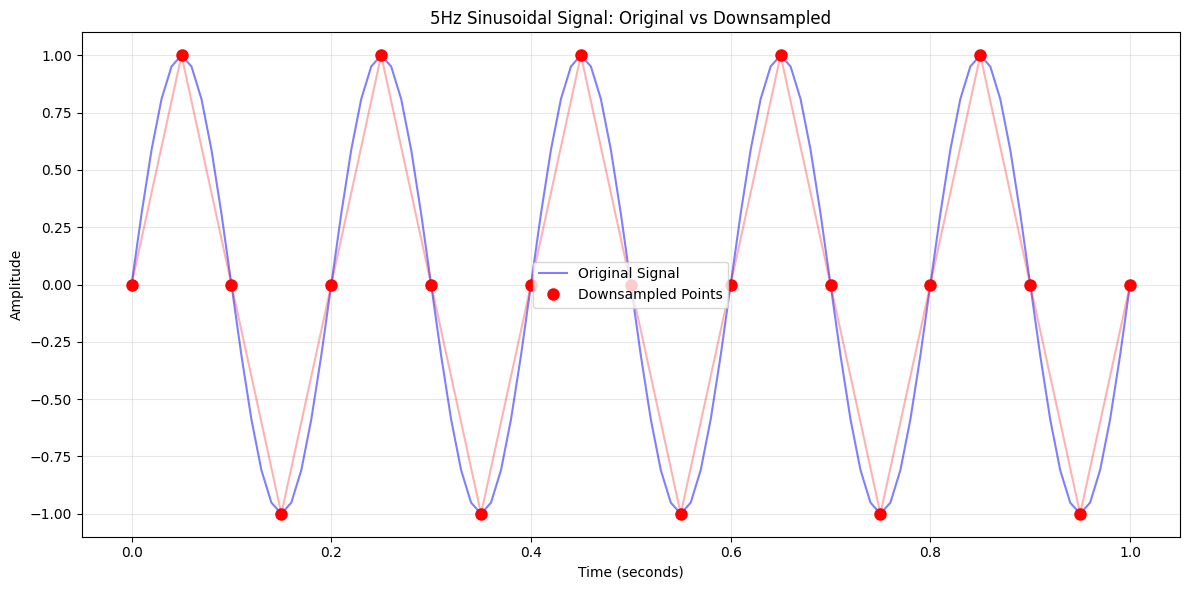

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def downsample_signal(signal):
    """
    Downsample a signal while keeping its peaks and valleys.
Takes a 5Hz signal and returns ~20% of its points, ensuring maxima 
and minima are preserved.

Args:
    signal (np.array): Input signal (5Hz, 0.01s sampling)

Returns:
    np.array: Downsampled signal with preserved extrema
    """
    # Find local maxima and minima using numpy's array operations
    # Using array operations is more efficient than looping
    peaks = np.where((signal[1:-1] > signal[:-2]) & 
                    (signal[1:-1] > signal[2:]))[0] + 1
    valleys = np.where((signal[1:-1] < signal[:-2]) & 
                      (signal[1:-1] < signal[2:]))[0] + 1
    
    # Get regular sample points (every 5th point)
    regular_points = np.arange(0, len(signal), 5)
    
    # Combine all points and ensure they're unique and sorted
    all_points = np.unique(np.concatenate([regular_points, peaks, valleys]))
    
    return signal[all_points]

def verify_downsampling():
    """
    Create and verify the downsampling of a 5Hz sinusoidal signal.
    Includes visualization and statistical verification.
    """
    # Generate time array (0 to 1 second, sampled every 0.01 seconds)
    t = np.linspace(0, 1, 101)  # 101 points for exactly 0.01s intervals
    
    # Create 5Hz sinusoidal signal
    original_signal = np.sin(2 * np.pi * 5 * t)
    
    # Downsample the signal
    downsampled_signal = downsample_signal(original_signal)
    t_downsampled = np.linspace(0, 1, len(downsampled_signal))
    
    # Print verification statistics
    print("\nDownsampling Statistics:")
    print(f"Original signal length: {len(original_signal)} points")
    print(f"Downsampled signal length: {len(downsampled_signal)} points")
    print(f"Reduction ratio: {len(downsampled_signal)/len(original_signal):.2%}")
    
    # Create visualization
    plt.figure(figsize=(12, 6))
    plt.plot(t, original_signal, 'b-', label='Original Signal', alpha=0.5)
    plt.plot(t_downsampled, downsampled_signal, 'ro', 
            label='Downsampled Points', markersize=8)
    plt.plot(t_downsampled, downsampled_signal, 'r-', alpha=0.3)
    
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.title('5Hz Sinusoidal Signal: Original vs Downsampled')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    verify_downsampling()

SECOND PART TO SECOND PART:)

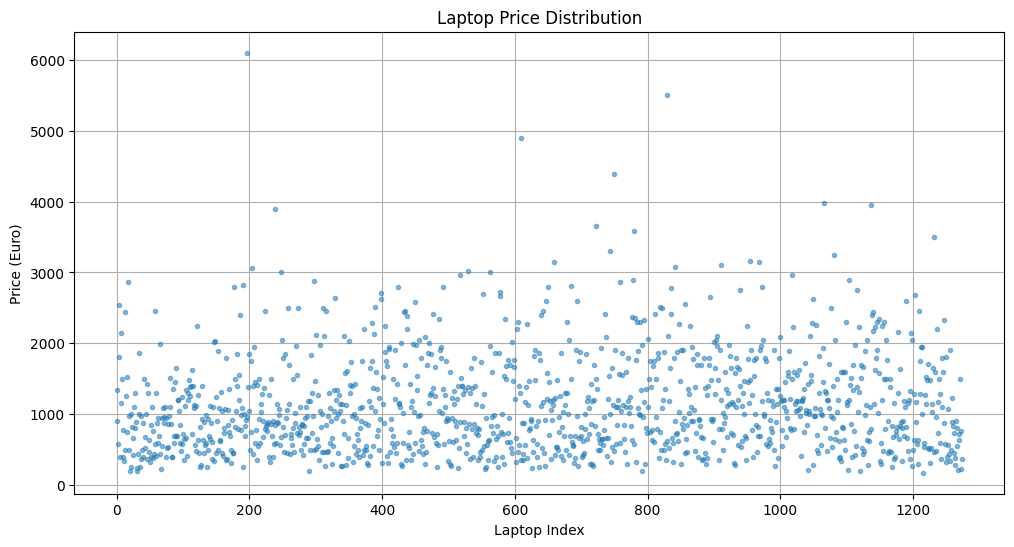

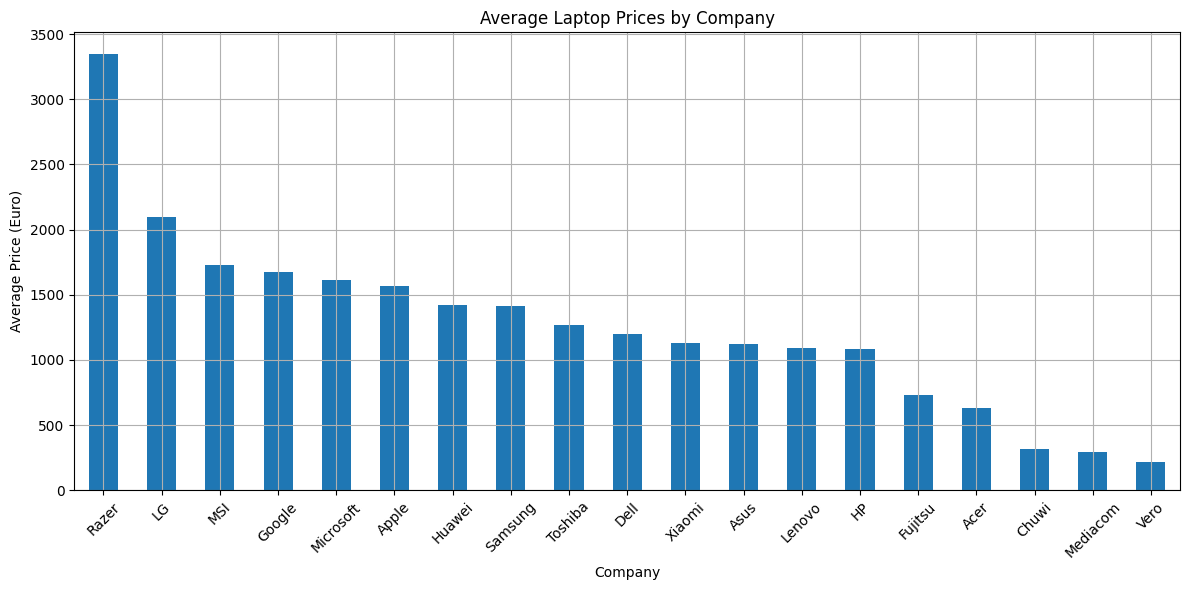


Most expensive brand: Razer (€3346.14)

OS Distribution:
OpSys_Clean
Windows      1101
No OS          66
Linux          58
Chrome OS      27
macOS          21
Other           2
Name: count, dtype: int64


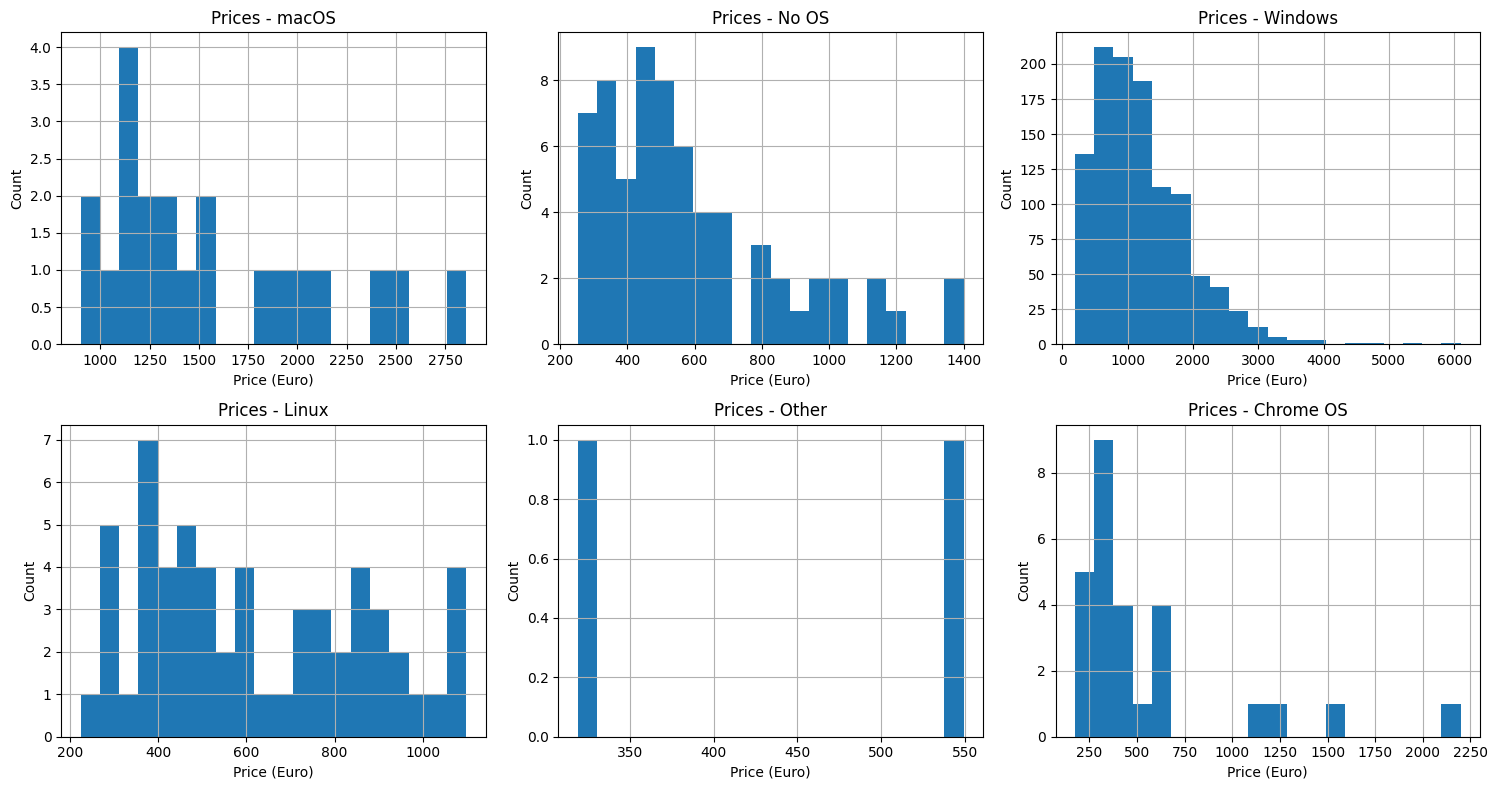

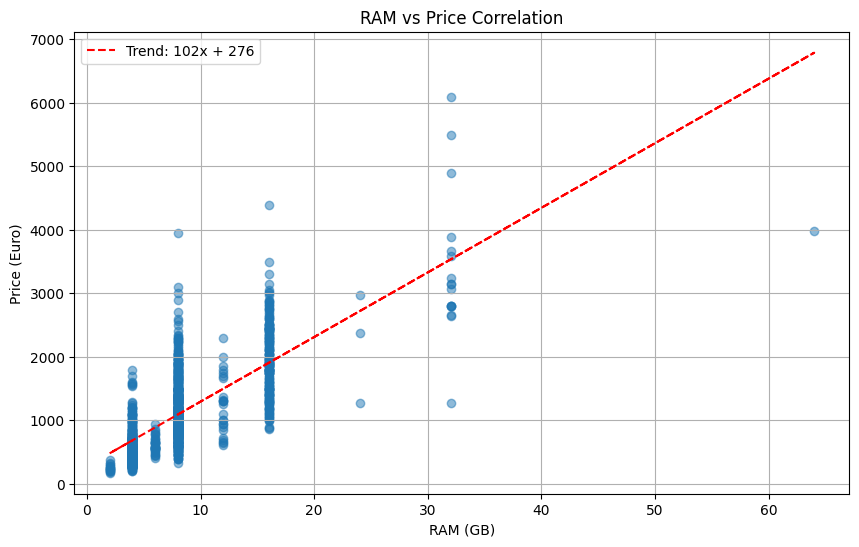


RAM-Price correlation: 0.74


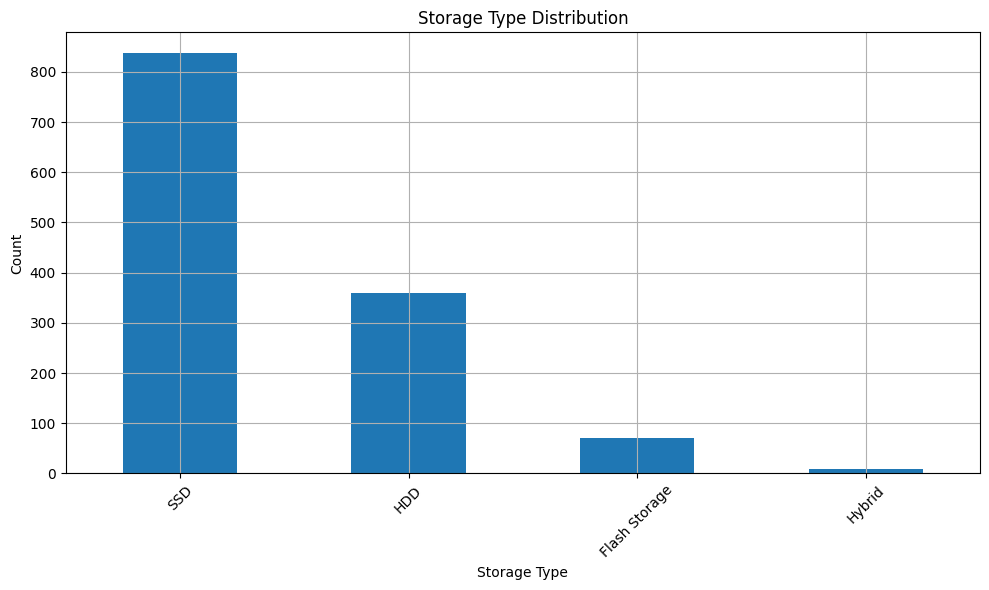

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

def analyze_laptop_data(file_path):
    """Main function to analyze laptop dataset and create visualizations."""
    # Load dataset
    df = pd.read_csv(file_path)

    # Plot 1: Price distribution
    plt.figure(figsize=(12, 6))
    plt.plot(df['Price (Euro)'], '.', alpha=0.5)
    plt.title('Laptop Price Distribution')
    plt.xlabel('Laptop Index'), plt.ylabel('Price (Euro)')
    plt.grid(True)
    plt.show()

    # Plot 2: Average price by company
    avg_price = df.groupby('Company')['Price (Euro)'].mean().sort_values(ascending=False)
    plt.figure(figsize=(12, 6))
    avg_price.plot(kind='bar')
    plt.title('Average Laptop Prices by Company')
    plt.xlabel('Company'), plt.ylabel('Average Price (Euro)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    print(f"\nMost expensive brand: {avg_price.index[0]} (€{avg_price.iloc[0]:.2f})")

    # Clean and analyze OS data
    df['OpSys_Clean'] = df['OpSys'].str.lower().apply(lambda x: 
        'Windows' if 'windows' in x else
        'macOS' if 'mac' in x else
        'Linux' if 'linux' in x else
        'Chrome OS' if 'chrome' in x else
        'No OS' if 'no os' in x else 'Other'
    )
    print("\nOS Distribution:")
    print(df['OpSys_Clean'].value_counts())

    # Plot 3: Price distribution by OS
    plt.figure(figsize=(15, 8))
    for i, os in enumerate(df['OpSys_Clean'].unique(), 1):
        plt.subplot(2, 3, i)
        df[df['OpSys_Clean'] == os]['Price (Euro)'].hist(bins=20)
        plt.title(f'Prices - {os}')
        plt.xlabel('Price (Euro)'), plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

    # Plot 4: RAM vs Price correlation
    plt.figure(figsize=(10, 6))
    plt.scatter(df['RAM (GB)'], df['Price (Euro)'], alpha=0.5)
    z = np.polyfit(df['RAM (GB)'], df['Price (Euro)'], 1)
    plt.plot(df['RAM (GB)'], np.poly1d(z)(df['RAM (GB)']), 'r--', 
             label=f'Trend: {z[0]:.0f}x + {z[1]:.0f}')
    plt.title('RAM vs Price Correlation')
    plt.xlabel('RAM (GB)'), plt.ylabel('Price (Euro)')
    plt.grid(True)
    plt.legend()
    plt.show()
    print(f"\nRAM-Price correlation: {df['RAM (GB)'].corr(df['Price (Euro)']):.2f}")

    # Plot 5: Storage type analysis
    df['Storage_Type'] = df['Memory'].str.lower().apply(lambda x: 
        'SSD' if 'ssd' in str(x) else
        'HDD' if 'hdd' in str(x) else
        'Hybrid' if 'hybrid' in str(x) else
        'Flash Storage' if 'flash' in str(x) else 'Other'
    )
    plt.figure(figsize=(10, 6))
    df['Storage_Type'].value_counts().plot(kind='bar')
    plt.title('Storage Type Distribution')
    plt.xlabel('Storage Type'), plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    analyze_laptop_data('laptop_price - dataset.csv')

# Bonus:

ideas for additional bonus questions and analysis: 
 1. Investigate the relationship between screen size and price. 
2. What is the relationship between CPU frequency and price? Create a scatter plot to visualize if laptops with faster processors command higher prices, and calculate the correlation coefficient.


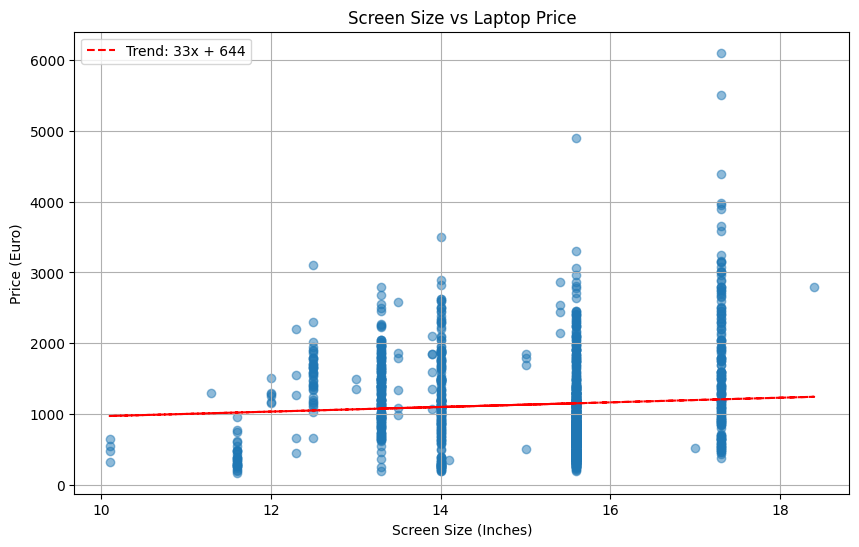


Screen size and price correlation: 0.07
Trend: Price = 33 × Screen Size + 644


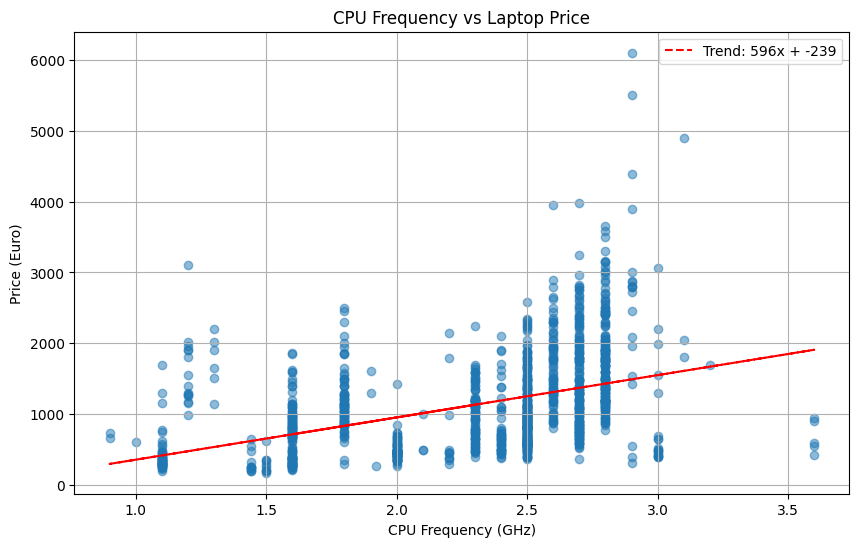


CPU frequency and price correlation: 0.43
Trend: Price = 596 × CPU Frequency + -239


In [12]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

def bonus_analysis(df):
   """Analyze relationships between laptop features and price:
   1. Screen size vs price
   2. CPU frequency vs price"""
   
   # Plot 1: Screen size vs Price
   plt.figure(figsize=(10, 6))
   plt.scatter(df['Inches'], df['Price (Euro)'], alpha=0.5)
   
   z = np.polyfit(df['Inches'], df['Price (Euro)'], 1)
   plt.plot(df['Inches'], np.poly1d(z)(df['Inches']), 'r--',
            label=f'Trend: {z[0]:.0f}x + {z[1]:.0f}')
   
   plt.title('Screen Size vs Laptop Price')
   plt.xlabel('Screen Size (Inches)')
   plt.ylabel('Price (Euro)')
   plt.grid(True)
   plt.legend()
   plt.show()

   screen_correlation = df['Inches'].corr(df['Price (Euro)'])
   print(f"\nScreen size and price correlation: {screen_correlation:.2f}")
   print(f"Trend: Price = {z[0]:.0f} × Screen Size + {z[1]:.0f}")

   # Plot 2: CPU Frequency vs Price
   plt.figure(figsize=(10, 6))
   plt.scatter(df['CPU_Frequency (GHz)'], df['Price (Euro)'], alpha=0.5)
   
   z = np.polyfit(df['CPU_Frequency (GHz)'], df['Price (Euro)'], 1)
   plt.plot(df['CPU_Frequency (GHz)'], np.poly1d(z)(df['CPU_Frequency (GHz)']), 'r--',
            label=f'Trend: {z[0]:.0f}x + {z[1]:.0f}')
   
   plt.title('CPU Frequency vs Laptop Price')
   plt.xlabel('CPU Frequency (GHz)')
   plt.ylabel('Price (Euro)')
   plt.grid(True)
   plt.legend()
   plt.show()

   cpu_correlation = df['CPU_Frequency (GHz)'].corr(df['Price (Euro)'])
   print(f"\nCPU frequency and price correlation: {cpu_correlation:.2f}")
   print(f"Trend: Price = {z[0]:.0f} × CPU Frequency + {z[1]:.0f}")

if __name__ == "__main__":
   df = pd.read_csv('laptop_price - dataset.csv')
   bonus_analysis(df)